# Challenge 1: Warming Up with the Digits

Consider the example at the end of Section 5.08 *In Depth: Decision trees and random forests*: **"Example: Random Forest for Classifying Digits"**. Copy the relevant code here and follow all the steps
1. Import the digits dataset.
2. Visualize the first few datapoints.
3. Do the standard train-test split.
4. Train a random forest classifier with 1000 trees.
5. Print the classification report.
6. Print the confusion matrix report.

According to these reports, which of the ten digits are perfectly recognized? 


In [33]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
from sklearn.datasets import load_digits
digits = load_digits()
digits.keys()

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])

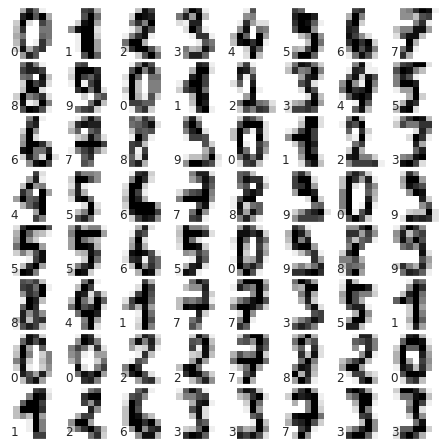

In [34]:
fig = plt.figure(figsize=(6, 6))  # figure size in inches
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)

for i in range(64):
    ax = fig.add_subplot(8, 8, i + 1, xticks=[], yticks=[])
    ax.imshow(digits.images[i], cmap=plt.cm.binary, interpolation='nearest')
    
    ax.text(0, 7, str(digits.target[i]))

In [35]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier


Xtrain, Xtest, ytrain, ytest = train_test_split(digits.data, digits.target,
                                                random_state=0)
model = RandomForestClassifier(n_estimators=1000)
model.fit(Xtrain, ytrain)
ypred = model.predict(Xtest)

In [36]:
from sklearn import metrics
print(metrics.classification_report(ypred, ytest))

              precision    recall  f1-score   support

           0       1.00      0.97      0.99        38
           1       1.00      0.98      0.99        44
           2       0.95      1.00      0.98        42
           3       0.98      0.96      0.97        46
           4       0.97      1.00      0.99        37
           5       0.98      0.98      0.98        48
           6       1.00      1.00      1.00        52
           7       1.00      0.96      0.98        50
           8       0.94      0.98      0.96        46
           9       0.98      0.98      0.98        47

    accuracy                           0.98       450
   macro avg       0.98      0.98      0.98       450
weighted avg       0.98      0.98      0.98       450



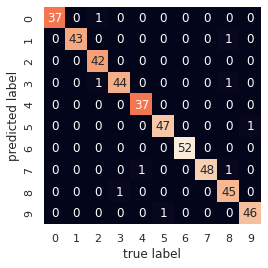

In [37]:
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(ytest, ypred)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False)
plt.xlabel('true label')
plt.ylabel('predicted label');

ANSWER: number 6

## Preliminaries

We can visualize the decision tree model as a graph. As an example, let us train a decision tree on the Iris dataset and then inspect the logic. 

In [38]:
# Load libraries
from sklearn.tree import DecisionTreeClassifier
from sklearn import datasets
from IPython.display import Image  
from sklearn import tree
import pydotplus

In [39]:
# Load Iris data
iris = datasets.load_iris()
X = iris.data
y = iris.target

In [40]:
# Create decision tree classifer object
clf = DecisionTreeClassifier(random_state=0)

# Train model
model = clf.fit(X, y)

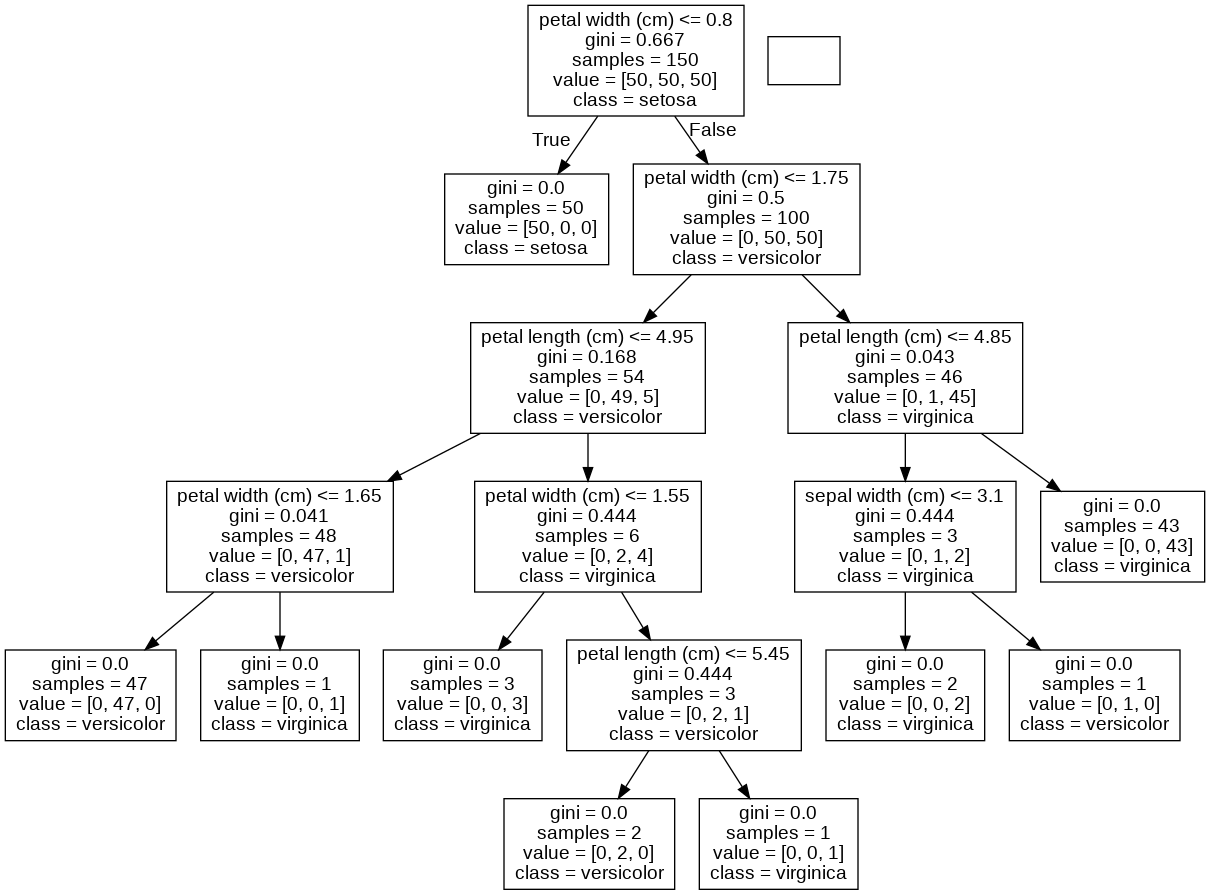

In [41]:
# Create DOT data
dot_data = tree.export_graphviz(clf, out_file=None, 
                                feature_names=iris.feature_names,  
                                class_names=iris.target_names)

# Draw graph
graph = pydotplus.graph_from_dot_data(dot_data)  

# Show graph
Image(graph.create_png())

## The actual challenge

1. Inspect the printouts in each node and make sure you understand what they mean. Then make a scatter plot of the petal width versus the petal length with points color-coded by target label. Draw the relevant horizontal and vertical lines to illustrate the portion of the decision tree above which depends on those two variables. Does your final plot agree with the node printouts from the decision tree?

2. The tree size can be controlled by several parameters which can be passed on as arguments to the DecisionTreeClassifier, see https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html?highlight=decisiontreeclassifier# The two most commonly used options to control the size of the tree are *max_depth* and *min_impurity_decrease*. Change their default values one at a time and redraw the resulting decision trees. For the submission change the default to *max_depth*=3 and then separately change *min_impurity_decrease*=0.1. Which of these two options results in a smaller tree (sometimes short trees are called "stumps")?

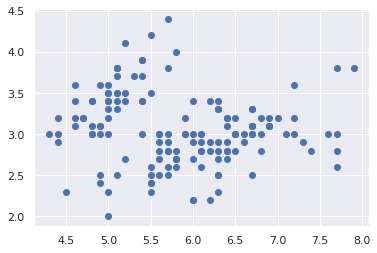

In [42]:

plt.scatter(X[:,0], X[:,1])


plt.show()

# Challenge 3: Identifying Important Features with Random Forests

In the previous challenge we saw that the decision tree uses mostly the features *petal width* and *petal length* to make the splits. This suggests that those two are important features while the remaining two features are not as important. Quantify the relative importance of the four features in the Iris dataset by training a RandomForestClassifier on it and printing out the *feature_importances_* attribute.